# Collective Quantum Exhaustive Search Experiments
These are defiend by the instructions in an email from 13.2.24 from IA to DM and TM.

## Used external notebooks

In [2]:
from ipynb.fs.full.ansatz import get_twolocal

### Imports

In [4]:
from qiskit.quantum_info import SparsePauliOp
import networkx as nx
import random

from hamiltonians import gen_trans_ising_op, get_exact_ground, gen_maxcut_op, gen_maxcut_op_from_graph
from experiment_utils import *
from graphing import plot_VQE_evals_list

random.seed(7)

## Two-qubit experiments
These experiments are run on two types of examples:
-   Molecular Hamiltonians: H2 and HeH.
-   Transverse-Field Ising Model Hamiltonians.

For these, we will present:
-   The energy landscape sampled using all MUB states (without an appended ansatz).
-   VQE execution from the best 10 MUB states as initial points (awaiting Dekel's code to do this).

### Hamiltonian Generation

In [5]:
H2_ham_0_75 = SparsePauliOp(data= ['II', 'IZ', 'ZI', 'ZZ', 'XX'],
coeffs= [-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,  0.18206025+0.j])

HeH_ham_1 = SparsePauliOp(data= ['II', 'IZ', 'IX', 'ZI', 'XI', 'ZZ', 'ZX', 'XZ', 'XX'],
coeffs= [-3.04506092+0.j,  0.50258052+0.j,  0.11926278+0.j, -0.50258052+0.j, 0.11926278+0.j, -0.13894646+0.j, -0.11926145+0.j,  0.11926145+0.j,  0.11714671+0.j])

molecular_hams = [H2_ham_0_75, HeH_ham_1]
molecular_descs = ["LiH, 0.75A, 2 qubits", "HeH, 1A, 2 qubits"]

transverse_hams = [gen_trans_ising_op(2, random.uniform(0,1), random.uniform(0,1)) for _ in range(2)]

### Calculate Landscape

===Calculating Molecular Landscapes===
attempting all MUB states over the operator SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,
  0.18206025+0.j])
Energy Landscape:


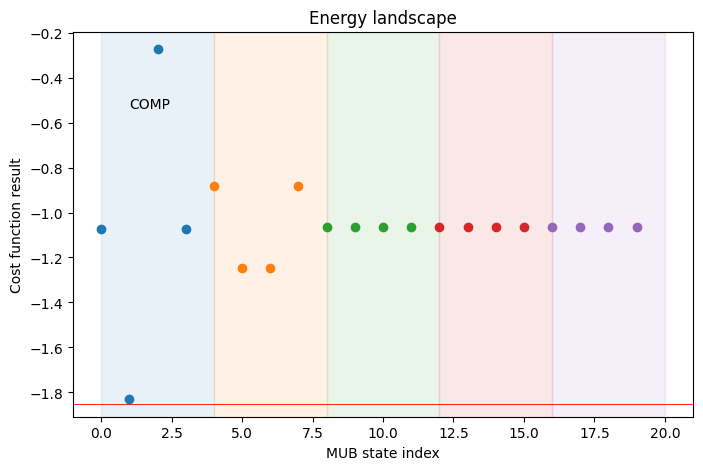

Energy Histogram:


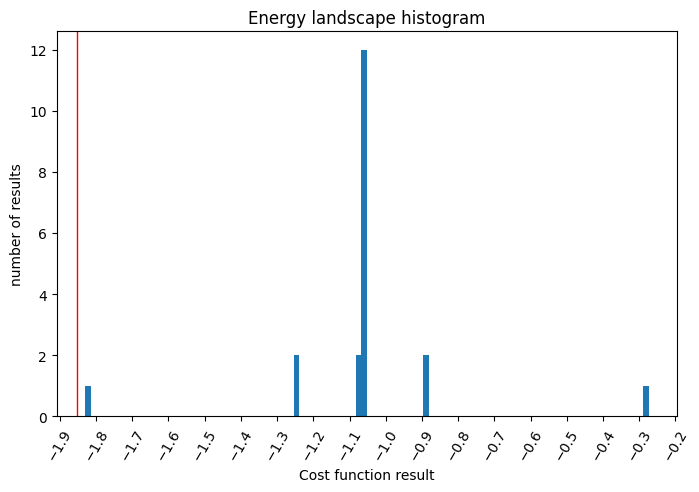

attempting all MUB states over the operator SparsePauliOp(['II', 'IZ', 'IX', 'ZI', 'XI', 'ZZ', 'ZX', 'XZ', 'XX'],
              coeffs=[-3.04506092+0.j,  0.50258052+0.j,  0.11926278+0.j, -0.50258052+0.j,
  0.11926278+0.j, -0.13894646+0.j, -0.11926145+0.j,  0.11926145+0.j,
  0.11714671+0.j])
Energy Landscape:


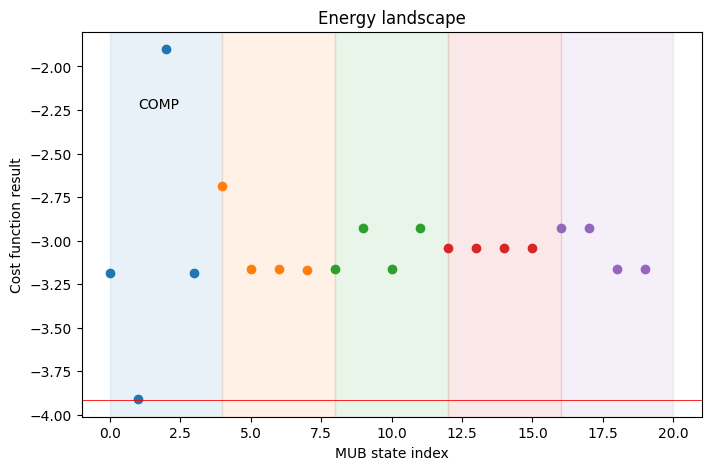

Energy Histogram:


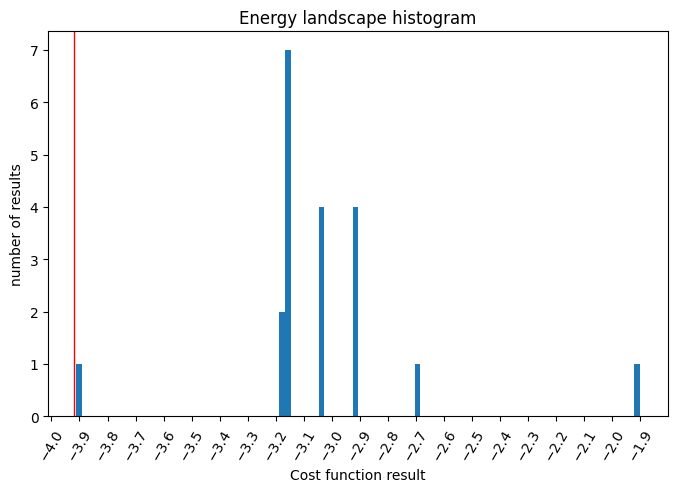

===Calculating Transverse Ising Landscapes===
attempting all MUB states over the operator SparsePauliOp(['ZZ', 'XI', 'IX'],
              coeffs=[0.32383276+0.j, 0.15084917+0.j, 0.15084917+0.j])
Energy Landscape:


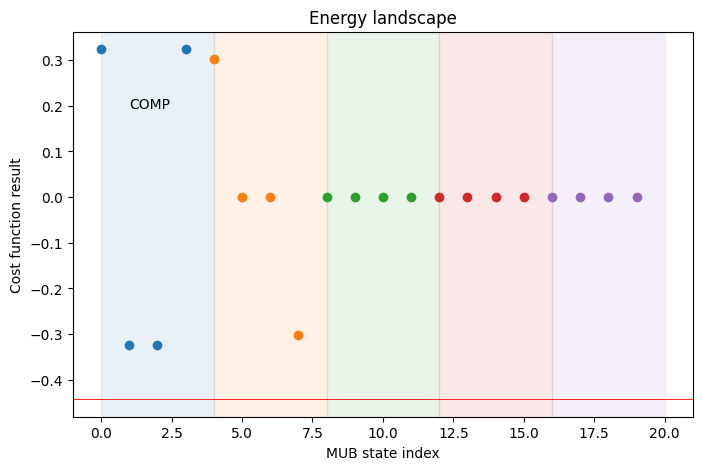

Energy Histogram:


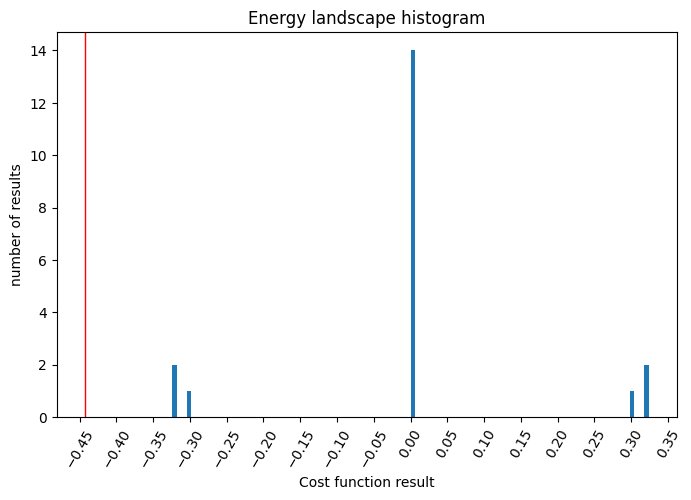

attempting all MUB states over the operator SparsePauliOp(['ZZ', 'XI', 'IX'],
              coeffs=[0.65093447+0.j, 0.07243629+0.j, 0.07243629+0.j])
Energy Landscape:


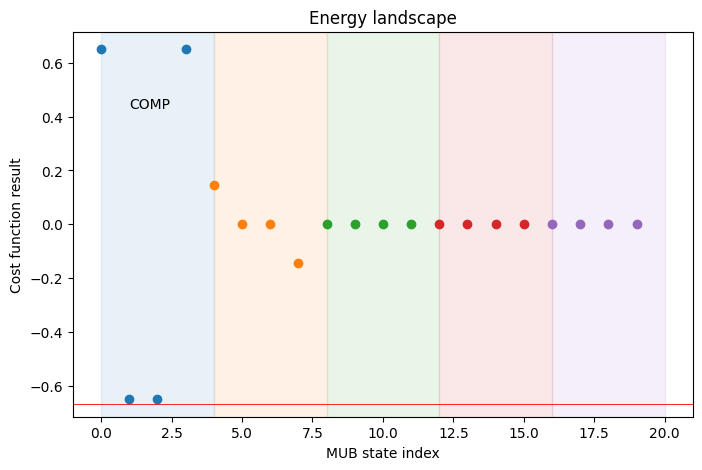

Energy Histogram:


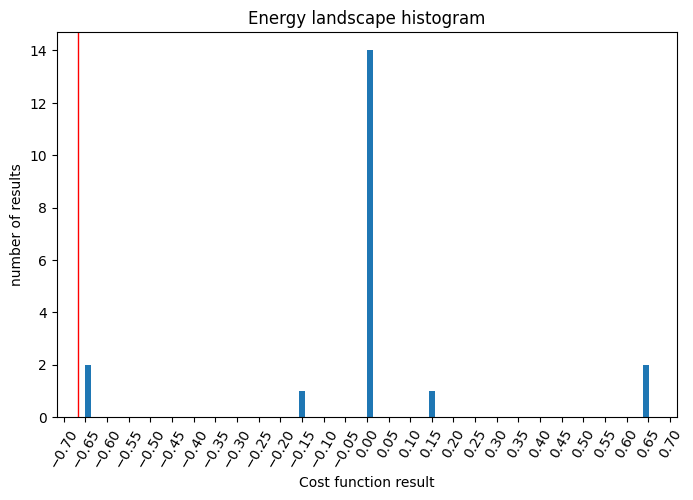

In [6]:
print("===Calculating Molecular Landscapes===")
molecular_landscapes = run_and_record_landscape_list(molecular_hams, n_mub_qubits=2)
print("===Calculating Transverse Ising Landscapes===")
transverse_landscapes = run_and_record_landscape_list(transverse_hams, n_mub_qubits=2)


### VQE Execution

The operator SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,
  0.18206025+0.j]) has the exact value -1.851311285646772.
Now trying to reach the value from the best and worst landscape points.
10: -1.5586667165367514
20: -1.8404198601162123
30: -1.8511338959844017
40: -1.8511800718671443
50: -1.851251673758137
60: -1.8513080772162165
70: -1.8513090566037556
80: -1.8513096366540958
90: -1.851310237244814
100: -1.8513103342321107
10: -1.8331419438294794
20: -1.8340174180609101
30: -1.8452235827098789
40: -1.8483526198885554
50: -1.8508859546716272
60: -1.8512674709919703
70: -1.8512774052717647
80: -1.8513074461545924
90: -1.8513089442800705
100: -1.851310765961877


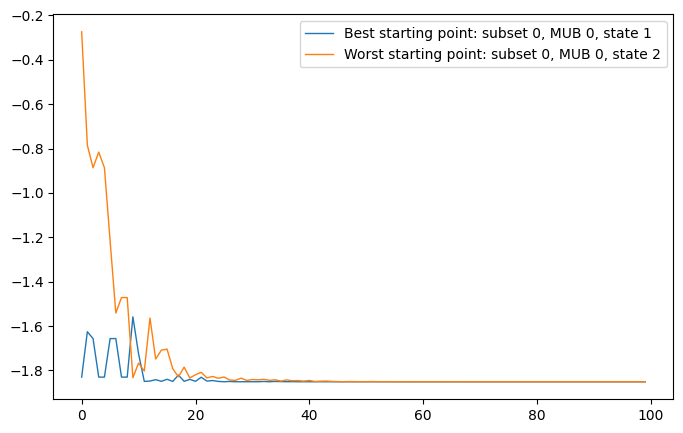

In [7]:
run_and_display_vqe_best_and_worst_expressive_2q(molecular_landscapes[0])

The operator SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,
  0.18206025+0.j]) has the exact value -1.851311285646772.
Now trying to reach the value from different MUB points.
running from state of index subset 0, MUB 0, state 1 and value -1.83030036
10: -1.5586667165367514
20: -1.8404198601162123
30: -1.8511338959844017
40: -1.8511800718671443
50: -1.851251673758137
60: -1.8513080772162165
70: -1.8513090566037556
80: -1.8513096366540958
90: -1.851310237244814
100: -1.8513103342321107
running from state of index subset 0, MUB 1, state 1 and value -1.24530027
10: -1.4082514031324829
20: -1.6457526786728938
30: -1.832151308268217
40: -1.84646547834114
50: -1.8488497420969203
60: -1.849103600605239
70: -1.8497225475363124
80: -1.8499575366593004
90: -1.8501538689267856
100: -1.8502788716716083
running from state of index subset 0, MUB 1, state 2 and value -1.24530027
10: -1.5633235758420603
20: -1.695

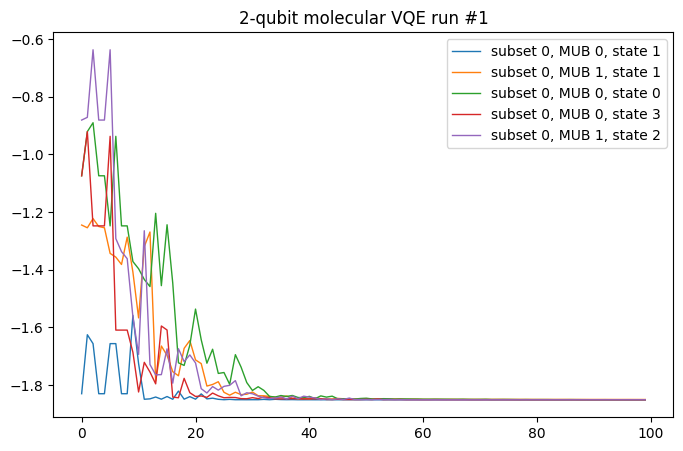

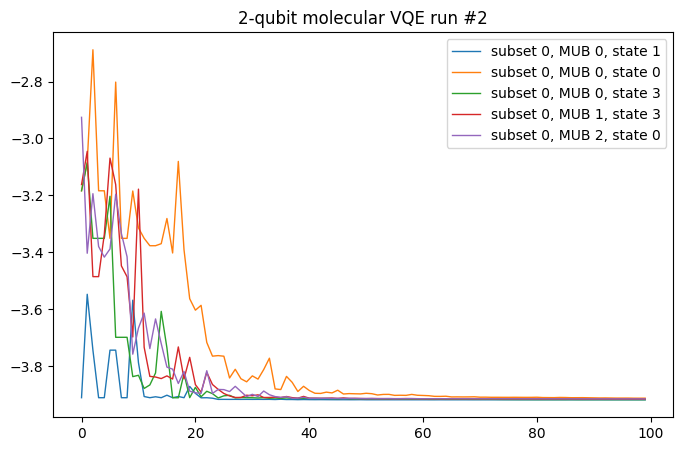

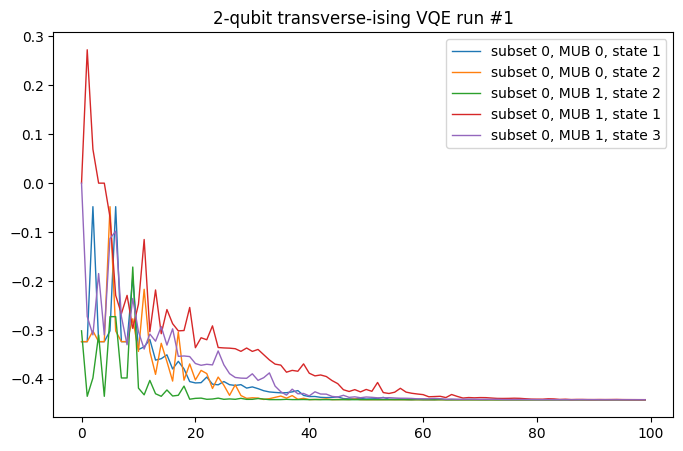

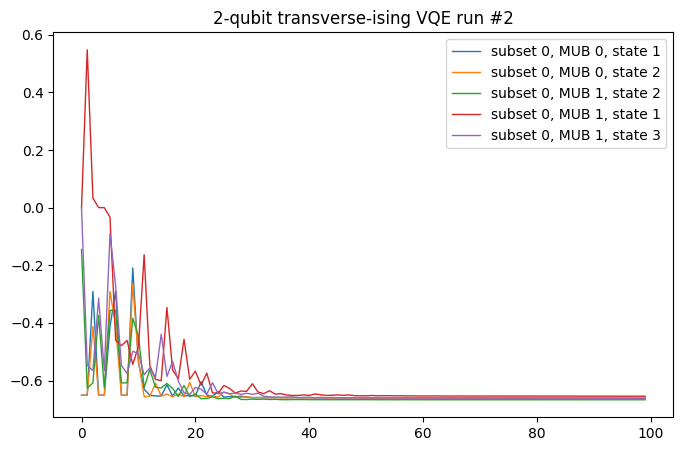

In [8]:
molecular_vqe_runs = run_and_record_vqe_expressive_2q_list(molecular_landscapes)
transverse_vqe_runs = run_and_record_vqe_expressive_2q_list(transverse_landscapes)
plot_VQE_evals_list(molecular_vqe_runs, "2-qubit molecular VQE run")
plot_VQE_evals_list(transverse_vqe_runs, "2-qubit transverse-ising VQE run")

## Three-qubit experiments
These experiments are run on two types of examples:
-   Hamiltonian reductions of MAXCUT problem instances.
-   Transverse-Field Ising Model Hamiltonians.

For these, we will present:
-   The energy landscape sampled using all MUB states, with an appended ansatz.
-   VQE execution from the best 10 MUB+ansatz states as initial points.

### Hamiltonian Generation

In [9]:
n_qubits = 3
n_mub_qubits = 3
edges_options =[[(0,1), (1,2), (2,0)],
    [(0,1), (1,2)]]
maxcut_hams = [gen_maxcut_op(n_qubits, edges) for edges in edges_options]
maxcut_ground_energies = [get_exact_ground(op) for op in maxcut_hams]

TRANSVERSE_OPS = 3
zz_coeffs = [random.uniform(0,1) for _ in range(TRANSVERSE_OPS)]
x_coeffs = [random.uniform(0,1) for _ in range(TRANSVERSE_OPS)]
transverse_hams = [gen_trans_ising_op(n_qubits, zz_coeff, x_coeff) for zz_coeff, x_coeff in zip(zz_coeffs, x_coeffs)]
transverse_ground_energies = [get_exact_ground(op) for op in transverse_hams]
ansatz = get_twolocal(n_qubits, n_qubits)

### Calculate Landscape

===Calculating Maxcut Landscapes===
attempting all MUB states over the operator SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'III'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -1.5+0.j])
Energy Landscape:


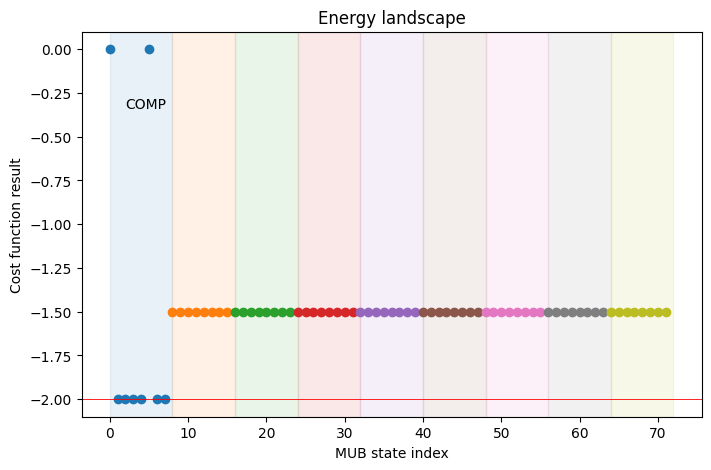

Energy Histogram:


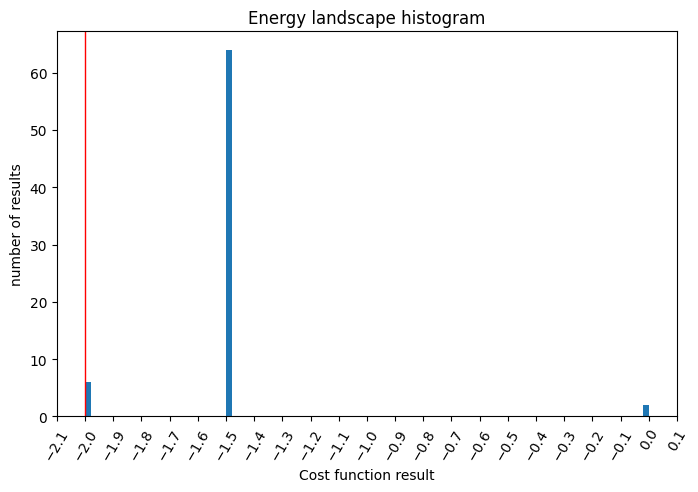

attempting all MUB states over the operator SparsePauliOp(['IZZ', 'ZZI', 'III'],
              coeffs=[ 0.5+0.j,  0.5+0.j, -1. +0.j])
Energy Landscape:


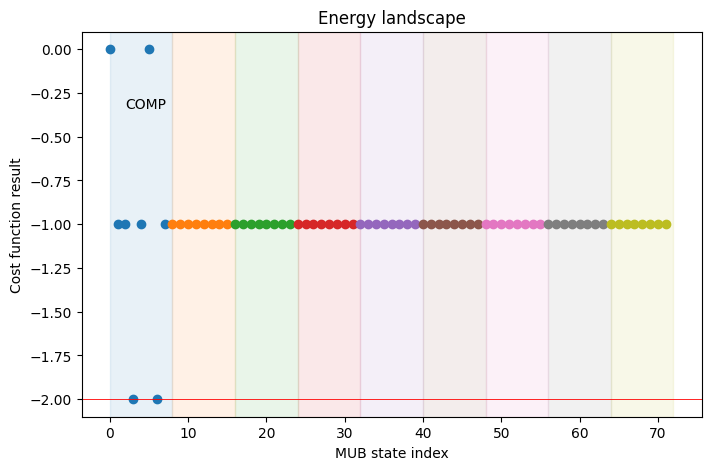

Energy Histogram:


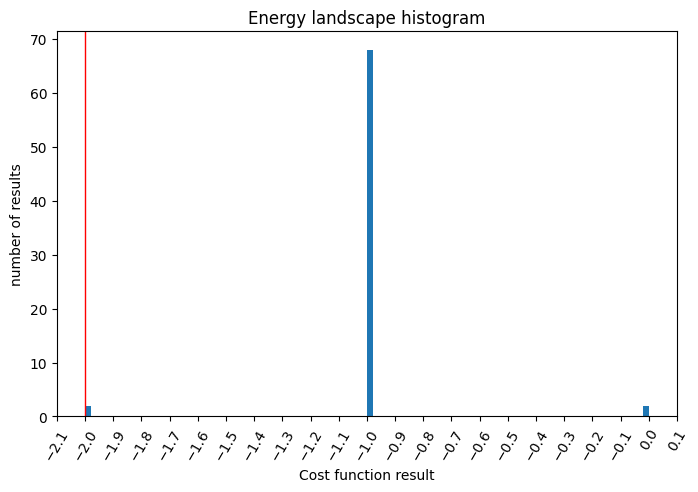

===Calculating Transverse Ising Landscapes===
attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.535882  +0.j, 0.535882  +0.j, 0.50743573+0.j, 0.50743573+0.j,
 0.50743573+0.j])
Energy Landscape:


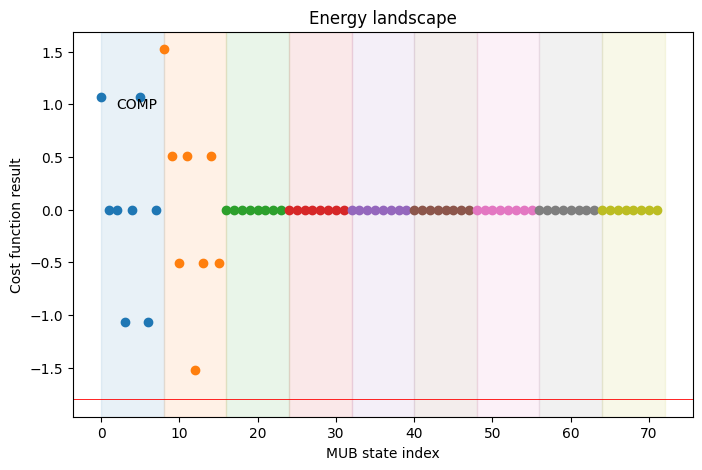

Energy Histogram:


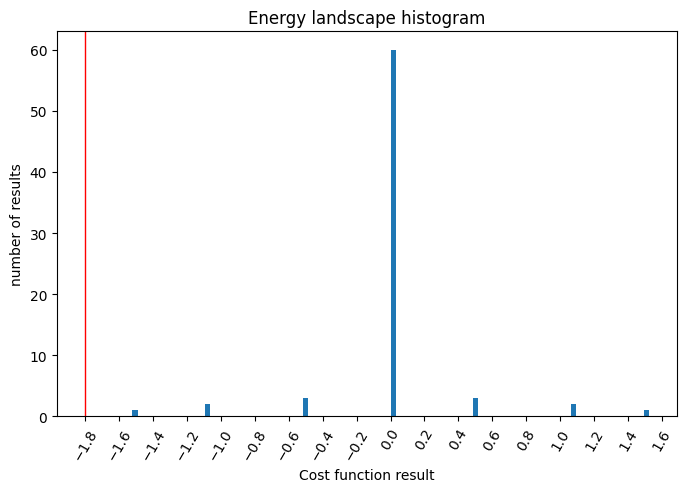

attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.36568892+0.j, 0.36568892+0.j, 0.03749566+0.j, 0.03749566+0.j,
 0.03749566+0.j])
Energy Landscape:


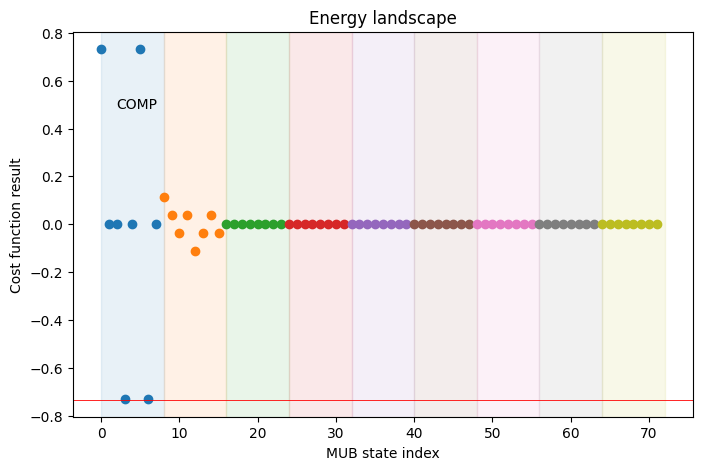

Energy Histogram:


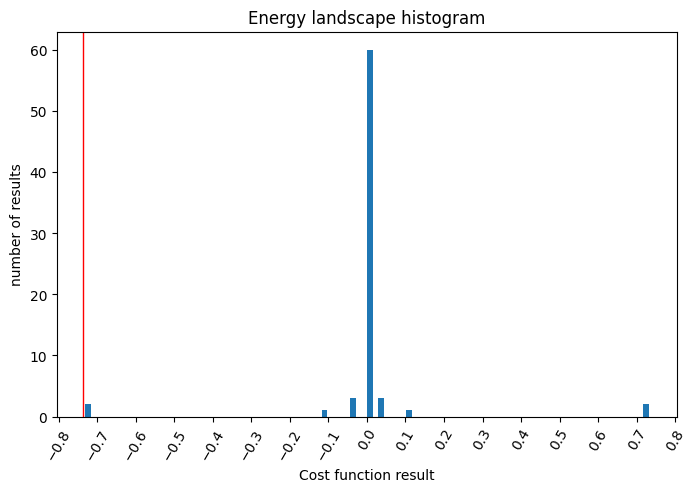

attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.05799892+0.j, 0.05799892+0.j, 0.43364568+0.j, 0.43364568+0.j,
 0.43364568+0.j])
Energy Landscape:


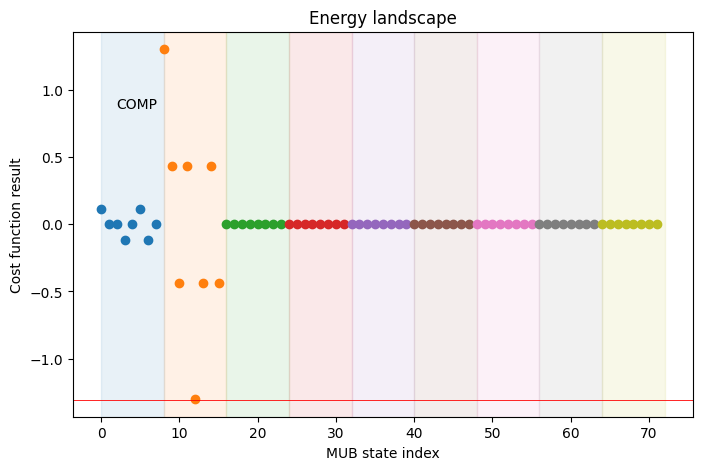

Energy Histogram:


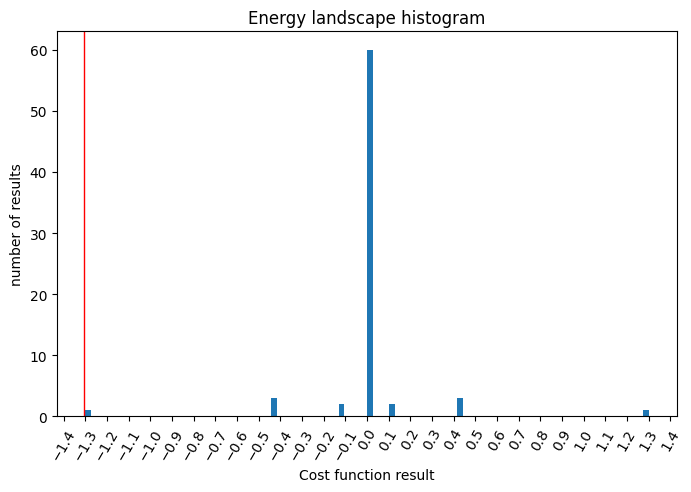

In [10]:

print("===Calculating Maxcut Landscapes===")
maxcut_landscapes = run_and_record_landscape_shifted_list(maxcut_hams, n_mub_qubits=3, ansatz=ansatz)
print("===Calculating Transverse Ising Landscapes===")
transverse_landscapes = run_and_record_landscape_shifted_list(transverse_hams, n_mub_qubits=3, ansatz=ansatz)


### VQE Runs

The operator SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'III'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -1.5+0.j]) has the exact value -2.0.
Now trying to reach the value from different MUB points.
running from state of index subset 0, MUB 0, state 1 and value -2.0
10: -2.0
20: -2.0
30: -2.0
40: -1.9673823984917007
50: -1.9694480499803904
60: -1.9550969058919052
70: -1.9550969058919052
80: -1.9550969058919052
90: -1.9550969058919052
100: -1.9984695807057655
110: -1.9996491281920967
120: -1.9985353257821665
130: -1.9985353257821665
140: -1.9985353257821665
150: -1.9985353257821665
160: -1.9999727747221163
170: -1.9999944981040856
180: -1.9999930179126437
190: -1.9999824151804095
200: -1.9999824151804095
210: -1.9999824151804095
220: -1.9999824151804095
230: -1.999999694384825
240: -1.9999999852024508
250: -1.9999996625221472
260: -1.9999996625221472
270: -1.9999996625221472
280: -1.9999996625221472
290: -1.9999999964095603
300: -1.99999999853366
310: -1.99999999393793
320: -1.99999

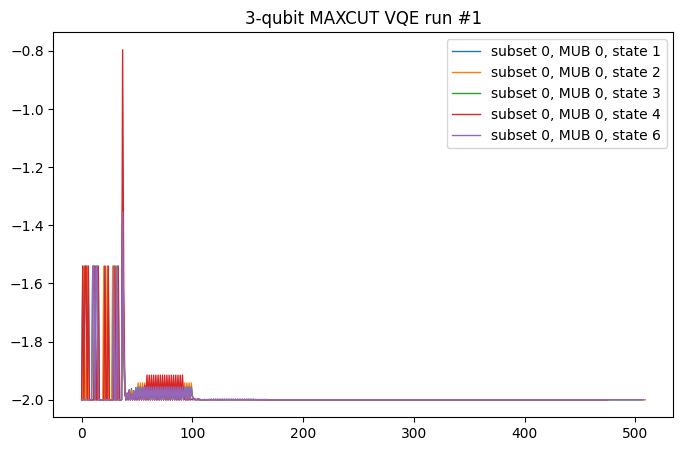

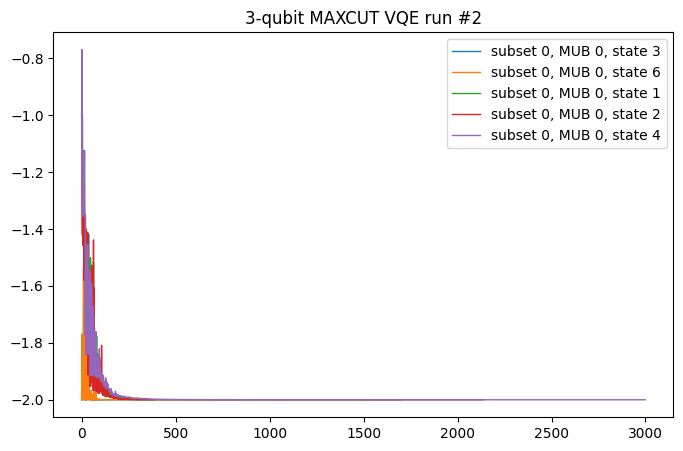

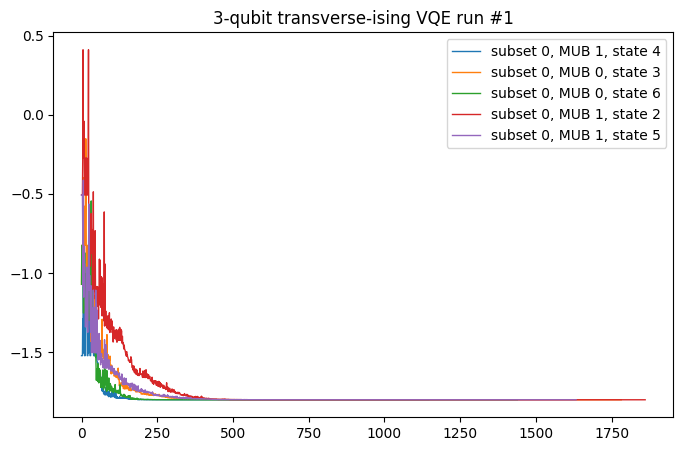

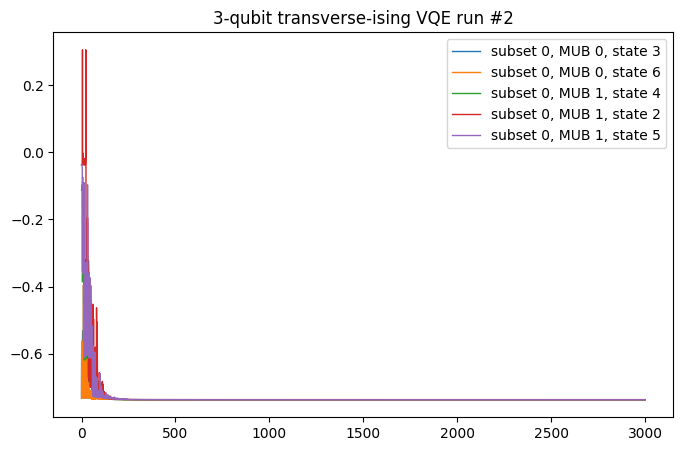

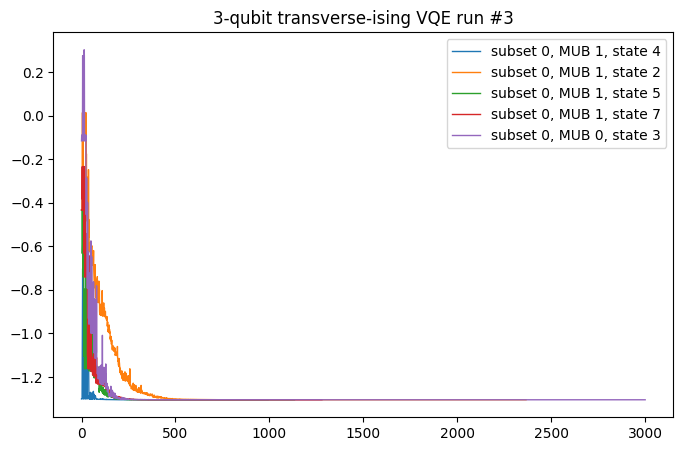

In [11]:
maxcut_vqe_runs = run_and_record_vqe_shifted_list(maxcut_landscapes, ansatz)
transverse_vqe_runs = run_and_record_vqe_shifted_list(transverse_landscapes, ansatz)   
plot_VQE_evals_list(maxcut_vqe_runs, "3-qubit MAXCUT VQE run")
plot_VQE_evals_list(transverse_vqe_runs, "3-qubit transverse-ising VQE run")

10: -0.8225060901664015
20: -1.5223071995682602
30: -1.5223071995682602
40: -1.4962564741893554
50: -1.4553311699934377
60: -1.66480557909499
70: -1.681509957288239
80: -1.762411284522397
90: -1.7588529344078572
100: -1.757818810825444
110: -1.7417907578728298
120: -1.7915988136462566
130: -1.7897562855746971
140: -1.7909190374338766
150: -1.789891341015106
160: -1.7971130068339596
170: -1.7964547257747139
180: -1.7977450456040738
190: -1.7990553877651236
200: -1.8001083481436018
210: -1.8006858605617735
220: -1.8007852409499256
230: -1.8007530455442775
240: -1.8008494195649578
250: -1.8008199408550785
260: -1.8009692292511073
270: -1.8010133320248822
280: -1.8009365169209164
290: -1.8009874170440499
300: -1.8010299478101337
310: -1.801035463171595
320: -1.8011005050697793
330: -1.8010986400520452
340: -1.8011185379595045
350: -1.8011300793162464
360: -1.8011255652042786
370: -1.8011269528454739
380: -1.801130247018592
390: -1.8011334051069143
400: -1.801132249494414
410: -1.8011378352

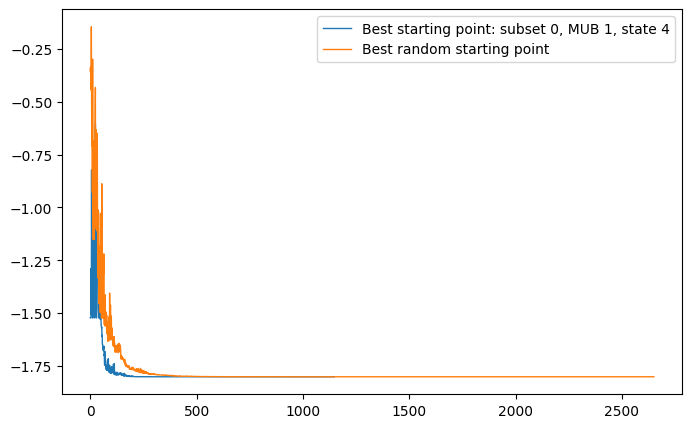

10: -0.7313778338251711
20: -0.7313778338251711
30: -0.3951651300765851
40: -0.7097868362022385
50: -0.7218630346551859
60: -0.719752554204491
70: -0.729879273865568
80: -0.7277919685891823
90: -0.7317118766264028
100: -0.733695295839818
110: -0.7332400266227311
120: -0.7344120044712749
130: -0.7350405330978041
140: -0.7350227776507934
150: -0.734656950440851
160: -0.7350407403470822
170: -0.7355636645971829
180: -0.735840925544503
190: -0.7360396120531536
200: -0.7360475537705796
210: -0.7360212755641292
220: -0.7360294193881894
230: -0.7359893656476061
240: -0.7360034771746794
250: -0.7361005740737064
260: -0.7361141717297779
270: -0.736130905202841
280: -0.7361700178705054
290: -0.7361804297615183
300: -0.7361789389895996
310: -0.7361849776736181
320: -0.7361889628179612
330: -0.7361877916461881
340: -0.736188740412796
350: -0.7361915504454817
360: -0.7361923446658566
370: -0.7361933759989119
380: -0.7361935147506479
390: -0.7361944184663988
400: -0.7361942483687348
410: -0.73619397

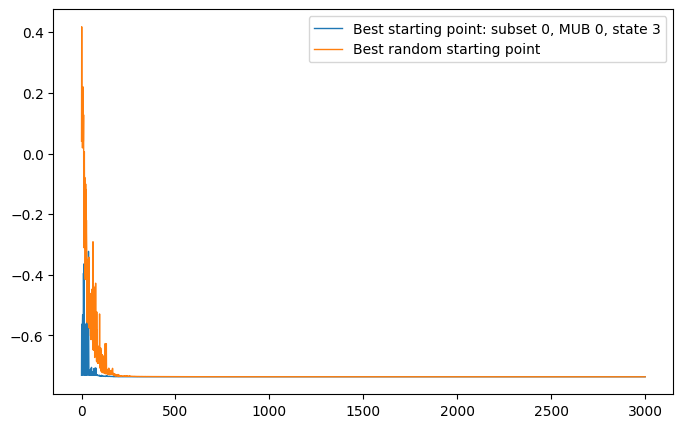

10: -0.7028992884376588
20: -1.3009370509871572
30: -1.3009370509871572
40: -1.2600665769809705
50: -1.2861925287171025
60: -1.2882477362466522
70: -1.2880742161043297
80: -1.301963973978832
90: -1.3027530114374954
100: -1.3029958162602886
110: -1.3031278802807167
120: -1.3033452028570496
130: -1.3038298616165436
140: -1.3038381427349175
150: -1.3043748724545399
160: -1.3041891525008755
170: -1.3043189649578044
180: -1.3042601984270474
190: -1.3045666974968784
200: -1.30407657008571
210: -1.304577556689969
220: -1.3046776076845414
230: -1.3046704309738681
240: -1.3047237824308096
250: -1.3047408531314364
260: -1.3047653666669892
270: -1.304772028917639
280: -1.304776625981642
290: -1.3047818285505273
300: -1.3047883569501217
310: -1.304794461186957
320: -1.3048017518508266
330: -1.3048102805993453
340: -1.3048115492528933
350: -1.3048092205845723
360: -1.304811377381281
370: -1.3048117708101516
380: -1.30481190425453
390: -1.304813515397016
400: -1.3048125171397205
410: -1.304813623065

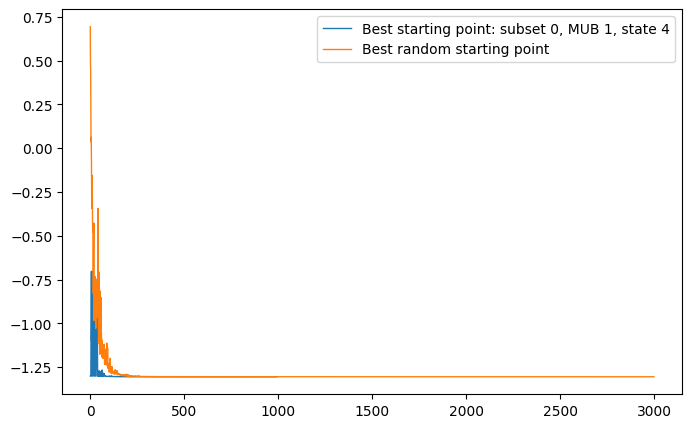

In [12]:
for transverse_landscape in transverse_landscapes:
    run_and_display_vqe_best_vs_random_shifted(transverse_landscape, ansatz, num_random=4)
    # run_and_display_vqe_best_and_worst_shifted(transverse_landscape, ansatz)

## >3 qubit experiments
These experiments are run on two types of examples:
-   Hamiltonian reductions of MAXCUT problem instances.
-   Transverse-Field Ising Model Hamiltonians.
-   **In addition**, the 4-qubit Molecular Hamiltonian will be landscaped here.

For these, we will present:
-   The energy landscape sampled using all partial-MUB states, with an appended ansatz.
-   VQE execution from the best 10 partial-MUB+ansatz states as initial points.

### Hamiltonian Generation

In [ ]:
# half-MUB experiments
n_mub_qubits = 3
n_qubits_list = list(range(4,9))

# Transverse Ising Hamiltonians
zz_coeffs = [random.uniform(0,1) for _ in n_qubits_list]
x_coeffs = [random.uniform(0,1) for _ in n_qubits_list]
transverse_ham_params = zip(n_qubits_list, zz_coeffs, x_coeffs)

LiH_ham_1_5 = SparsePauliOp(
    data= ['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 'IXII', 'XXII', 'YYII',
    'ZZII', 'XZII', 'XIII', 'ZIII', 'IZIZ', 'IZZX', 'IZIX', 'IZXX', 'IZYY', 'ZXIZ', 'IXIZ', 'ZXZX', 'IXZX', 'ZXIX', 'IXIX', 'ZXXX',
    'IXXX', 'ZXYY', 'IXYY', 'XXIZ', 'YYIZ', 'XXZX', 'YYZX', 'XXIX', 'YYIX', 'XXXX', 'YYXX', 'XXYY', 'YYYY', 'ZZIZ', 'ZZZX', 'ZZIX',
    'ZZXX', 'ZZYY', 'XZIZ', 'XIIZ', 'XZZX', 'XIZX', 'XZIX', 'XIIX', 'XZXX', 'XIXX', 'XZYY', 'XIYY', 'ZIIZ', 'ZIZX', 'ZIIX', 'ZIXX',
    'ZIYY', 'IZZZ', 'IZXZ', 'IZXI', 'ZXZZ', 'IXZZ', 'ZXXZ', 'IXXZ', 'ZXXI', 'IXXI', 'XXZZ', 'YYZZ', 'XXXZ', 'YYXZ', 'XXXI', 'YYXI',
    'ZZZZ', 'ZZXZ', 'ZZXI', 'XZZZ', 'XIZZ', 'XZXZ', 'XIXZ', 'XZXI', 'XIXI', 'ZIZZ', 'ZIXZ', 'ZIXI', 'IZZI', 'ZXZI', 'IXZI', 'XXZI',
    'YYZI', 'ZZZI', 'XZZI', 'XIZI', 'ZIZI'], 
coeffs = [-1.99754128e-01+0.j, -9.17966069e-02+0.j, -2.73410751e-03+0.j,
        2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,  -2.11959340e-01+0.j,  1.95776538e-02+0.j,  1.95776538e-02+0.j,
        3.71356404e-01+0.j,  9.17966069e-02+0.j,  2.73410751e-03+0.j, 2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,
       -2.11959340e-01+0.j, -1.95776538e-02+0.j,  1.95776538e-02+0.j, -3.71356404e-01+0.j, -1.23570872e-01+0.j,  1.17336239e-02+0.j,
       -1.17336239e-02+0.j,  3.30587286e-02+0.j, -3.30587286e-02+0.j, 1.17336239e-02+0.j,  1.17336239e-02+0.j, -3.03465683e-03+0.j,
       -3.03465683e-03+0.j,  3.03465683e-03+0.j,  3.03465683e-03+0.j, -8.37336142e-03+0.j, -8.37336142e-03+0.j,  8.37336142e-03+0.j,
        8.37336142e-03+0.j, -3.30587286e-02+0.j,  3.30587286e-02+0.j, 8.37336142e-03+0.j, -8.37336142e-03+0.j, -8.37336142e-03+0.j,
        8.37336142e-03+0.j,  3.07383272e-02+0.j, -3.07383272e-02+0.j, -3.07383272e-02+0.j,  3.07383272e-02+0.j,  5.66560676e-02+0.j,
        1.54067009e-03+0.j, -1.54067009e-03+0.j,  2.36793690e-03+0.j, -2.36793690e-03+0.j, -1.27339140e-02+0.j,  1.27339140e-02+0.j,
        2.11113767e-03+0.j, -2.11113767e-03+0.j, -2.11113767e-03+0.j, 2.11113767e-03+0.j,  7.76444118e-03+0.j, -7.76444118e-03+0.j,
       -7.76444118e-03+0.j,  7.76444118e-03+0.j,  1.14339547e-01+0.j, -1.05401874e-02+0.j,  1.05401874e-02+0.j, -3.51167704e-02+0.j,
        3.51167704e-02+0.j, -5.66560676e-02+0.j, -1.27339140e-02+0.j, -1.27339140e-02+0.j, -1.54067009e-03+0.j, -1.54067009e-03+0.j,
        2.11113767e-03+0.j,  2.11113767e-03+0.j,  2.11113767e-03+0.j, 2.11113767e-03+0.j,  2.36793690e-03+0.j, -2.36793690e-03+0.j,
       -7.76444118e-03+0.j,  7.76444118e-03+0.j, -7.76444118e-03+0.j, 7.76444118e-03+0.j,  8.47039180e-02+0.j, -9.01204279e-03+0.j,
       -9.01204279e-03+0.j,  9.01204279e-03+0.j, -9.01204279e-03+0.j, -6.57574490e-03+0.j,  6.57574490e-03+0.j, -6.57574490e-03+0.j,
        6.57574490e-03+0.j,  6.05056057e-02+0.j,  1.08894077e-02+0.j, 1.08894077e-02+0.j,  1.14339547e-01+0.j, -1.05401874e-02+0.j,
       -1.05401874e-02+0.j,  3.51167704e-02+0.j, -3.51167704e-02+0.j, -6.05056057e-02+0.j,  1.08894077e-02+0.j, -1.08894077e-02+0.j,
       -1.14091635e-01+0.j]
)
molecular_ground_energy = get_exact_ground(LiH_ham_1_5)

transverse_hams = [gen_trans_ising_op(*ham_params) for ham_params in transverse_ham_params]
transverse_ground_energies = [get_exact_ground(op) for op in transverse_hams]


# MAXCUT Hamiltonians
rand_graph_4 = nx.gnm_random_graph(4, 5)
rand_graph_5 = nx.gnm_random_graph(5, 9)
rand_graph_6 = nx.gnm_random_graph(6, 12)
rand_graph_7 = nx.gnm_random_graph(7, 12)
rand_graph_8 = nx.gnm_random_graph(8, 14)
graphs = [rand_graph_4, rand_graph_5, rand_graph_6, rand_graph_7, rand_graph_8]
maxcut_hams = [gen_maxcut_op_from_graph(graph) for graph in graphs]
maxcut_exact_results = [get_exact_ground(op) for op in maxcut_hams]

# ansatzes = [TwoLocal(n, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=n, insert_barriers=True).decompose() for n in n_qubits_list]


### Calculate Landscape

===Calculating Molecular Landscapes===
attempting all MUB states over the operator SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 'IXII', 'XXII', 'YYII', 'ZZII', 'XZII', 'XIII', 'ZIII', 'IZIZ', 'IZZX', 'IZIX', 'IZXX', 'IZYY', 'ZXIZ', 'IXIZ', 'ZXZX', 'IXZX', 'ZXIX', 'IXIX', 'ZXXX', 'IXXX', 'ZXYY', 'IXYY', 'XXIZ', 'YYIZ', 'XXZX', 'YYZX', 'XXIX', 'YYIX', 'XXXX', 'YYXX', 'XXYY', 'YYYY', 'ZZIZ', 'ZZZX', 'ZZIX', 'ZZXX', 'ZZYY', 'XZIZ', 'XIIZ', 'XZZX', 'XIZX', 'XZIX', 'XIIX', 'XZXX', 'XIXX', 'XZYY', 'XIYY', 'ZIIZ', 'ZIZX', 'ZIIX', 'ZIXX', 'ZIYY', 'IZZZ', 'IZXZ', 'IZXI', 'ZXZZ', 'IXZZ', 'ZXXZ', 'IXXZ', 'ZXXI', 'IXXI', 'XXZZ', 'YYZZ', 'XXXZ', 'YYXZ', 'XXXI', 'YYXI', 'ZZZZ', 'ZZXZ', 'ZZXI', 'XZZZ', 'XIZZ', 'XZXZ', 'XIXZ', 'XZXI', 'XIXI', 'ZIZZ', 'ZIXZ', 'ZIXI', 'IZZI', 'ZXZI', 'IXZI', 'XXZI', 'YYZI', 'ZZZI', 'XZZI', 'XIZI', 'ZIZI'],
              coeffs=[-1.99754128e-01+0.j, -9.17966069e-02+0.j, -2.73410751e-03+0.j,
  2.73410751e-03

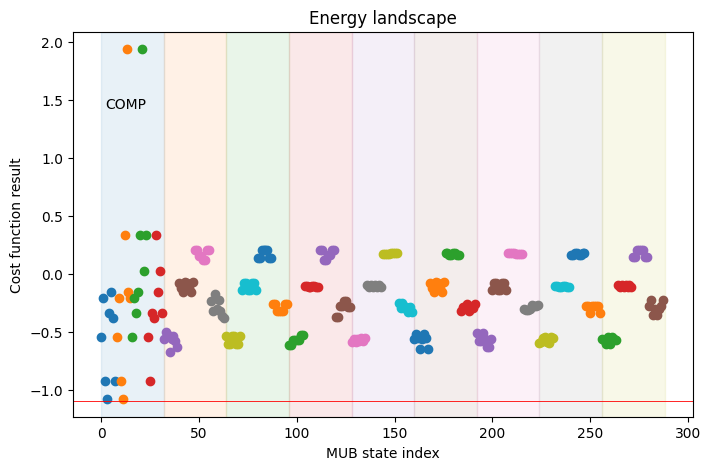

Energy Histogram:


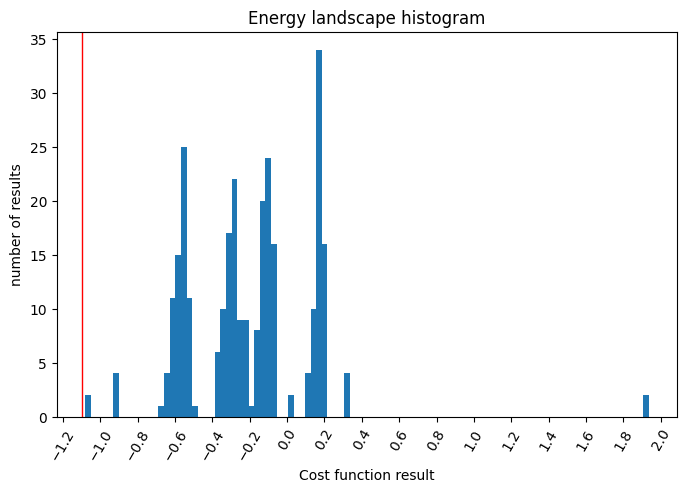

===Calculating Transverse Landscapes===
attempting all MUB states over the operator SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[0.06985542+0.j, 0.06985542+0.j, 0.06985542+0.j, 0.22323896+0.j,
 0.22323896+0.j, 0.22323896+0.j, 0.22323896+0.j])
Energy Landscape:


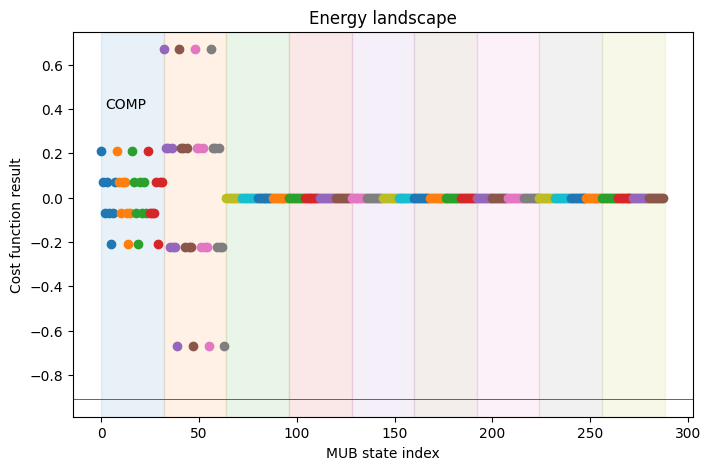

Energy Histogram:


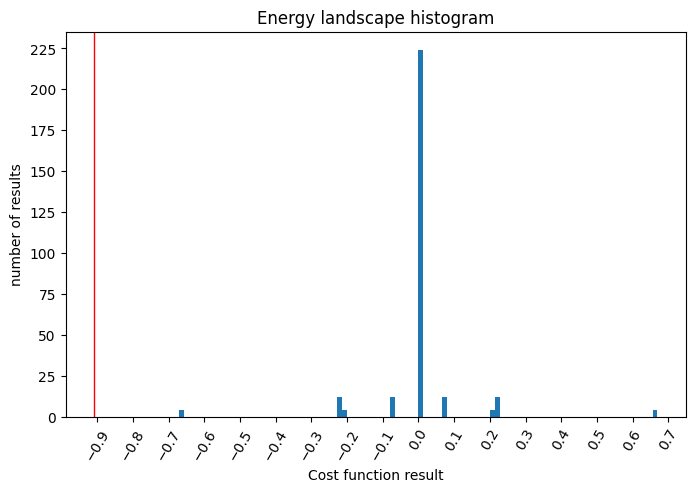

attempting all MUB states over the operator SparsePauliOp(['ZZIII', 'IZZII', 'IIZZI', 'IIIZZ', 'XIIII', 'IXIII', 'IIXII', 'IIIXI', 'IIIIX'],
              coeffs=[0.09071301+0.j, 0.09071301+0.j, 0.09071301+0.j, 0.09071301+0.j,
 0.62743322+0.j, 0.62743322+0.j, 0.62743322+0.j, 0.62743322+0.j,
 0.62743322+0.j])
Energy Landscape:


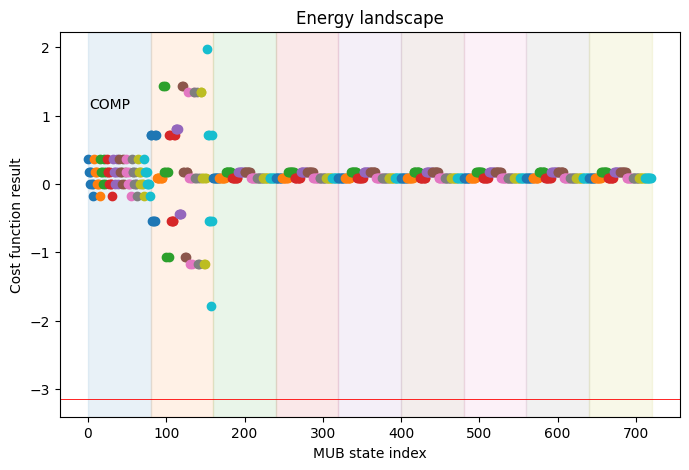

Energy Histogram:


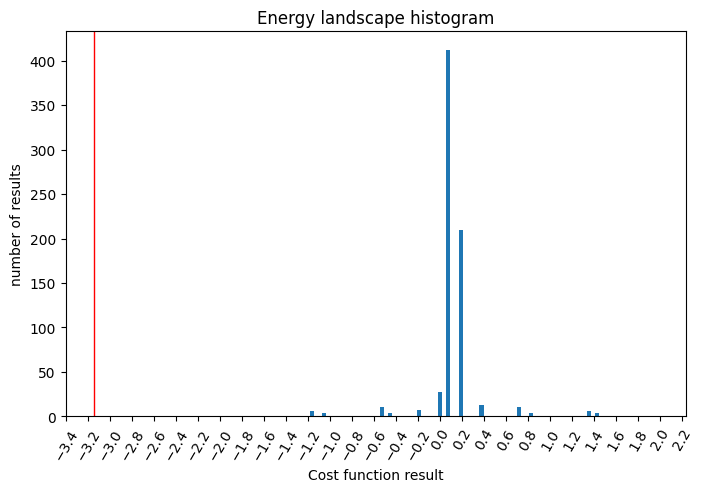

attempting all MUB states over the operator SparsePauliOp(['ZZIIII', 'IZZIII', 'IIZZII', 'IIIZZI', 'IIIIZZ', 'XIIIII', 'IXIIII', 'IIXIII', 'IIIXII', 'IIIIXI', 'IIIIIX'],
              coeffs=[0.42451919+0.j, 0.42451919+0.j, 0.42451919+0.j, 0.42451919+0.j,
 0.42451919+0.j, 0.94770894+0.j, 0.94770894+0.j, 0.94770894+0.j,
 0.94770894+0.j, 0.94770894+0.j, 0.94770894+0.j])
Energy Landscape:


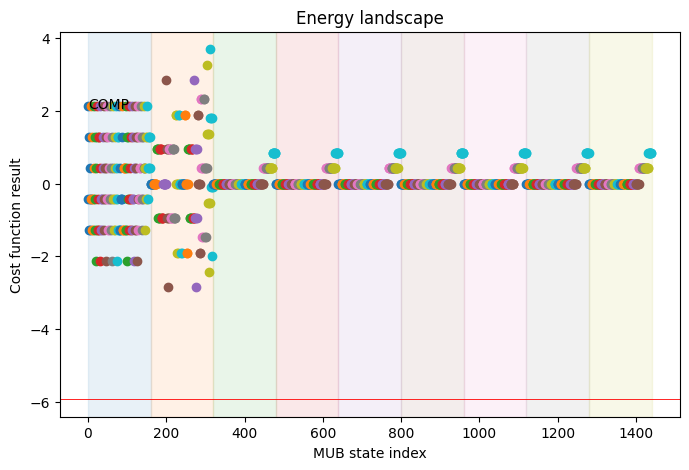

Energy Histogram:


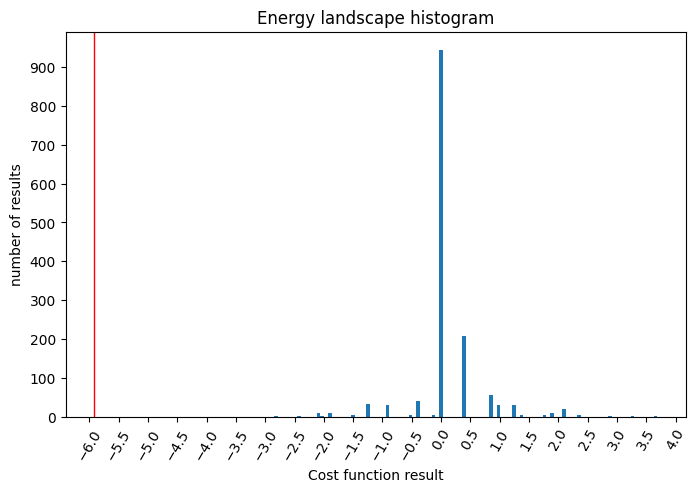

attempting all MUB states over the operator SparsePauliOp(['ZZIIIII', 'IZZIIII', 'IIZZIII', 'IIIZZII', 'IIIIZZI', 'IIIIIZZ', 'XIIIIII', 'IXIIIII', 'IIXIIII', 'IIIXIII', 'IIIIXII', 'IIIIIXI', 'IIIIIIX'],
              coeffs=[0.82685212+0.j, 0.82685212+0.j, 0.82685212+0.j, 0.82685212+0.j,
 0.82685212+0.j, 0.82685212+0.j, 0.57710295+0.j, 0.57710295+0.j,
 0.57710295+0.j, 0.57710295+0.j, 0.57710295+0.j, 0.57710295+0.j,
 0.57710295+0.j])
Energy Landscape:


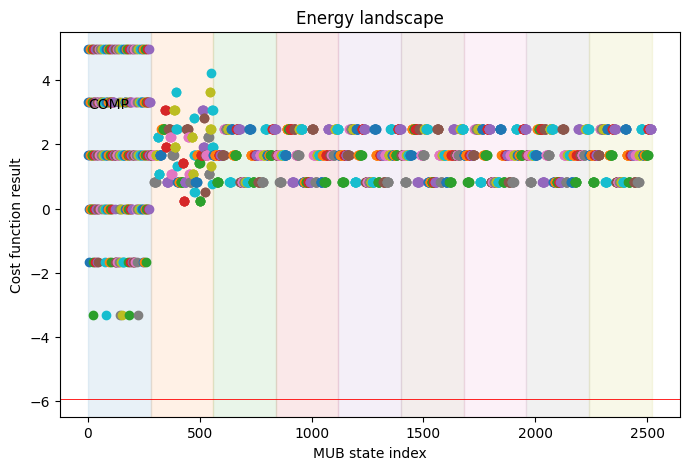

Energy Histogram:


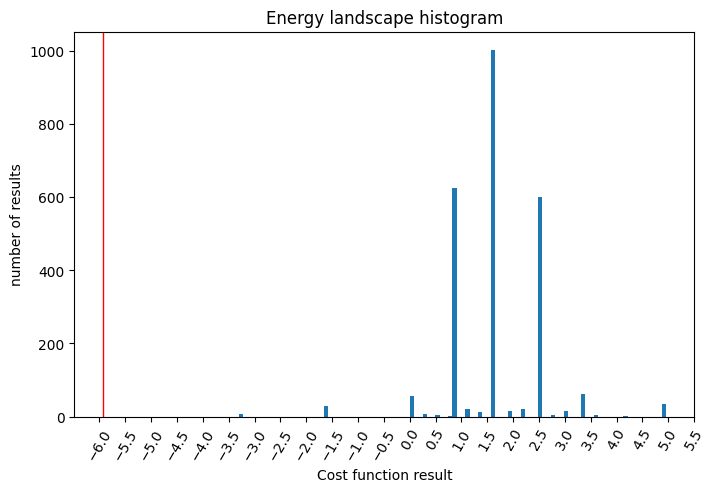

attempting all MUB states over the operator SparsePauliOp(['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ', 'XIIIIIII', 'IXIIIIII', 'IIXIIIII', 'IIIXIIII', 'IIIIXIII', 'IIIIIXII', 'IIIIIIXI', 'IIIIIIIX'],
              coeffs=[0.12380196+0.j, 0.12380196+0.j, 0.12380196+0.j, 0.12380196+0.j,
 0.12380196+0.j, 0.12380196+0.j, 0.12380196+0.j, 0.39668047+0.j,
 0.39668047+0.j, 0.39668047+0.j, 0.39668047+0.j, 0.39668047+0.j,
 0.39668047+0.j, 0.39668047+0.j, 0.39668047+0.j])
Energy Landscape:


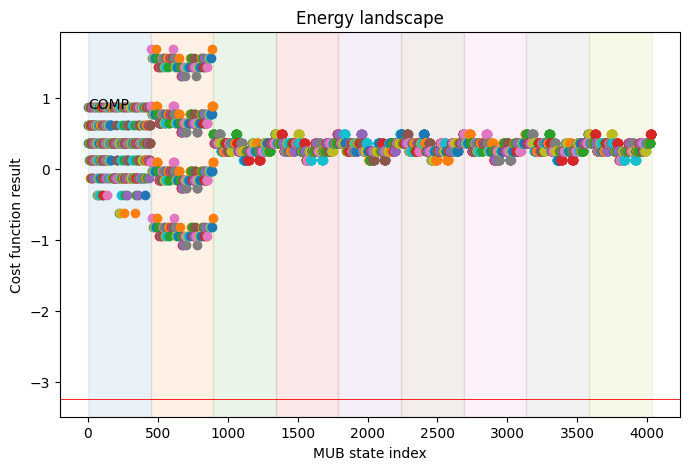

Energy Histogram:


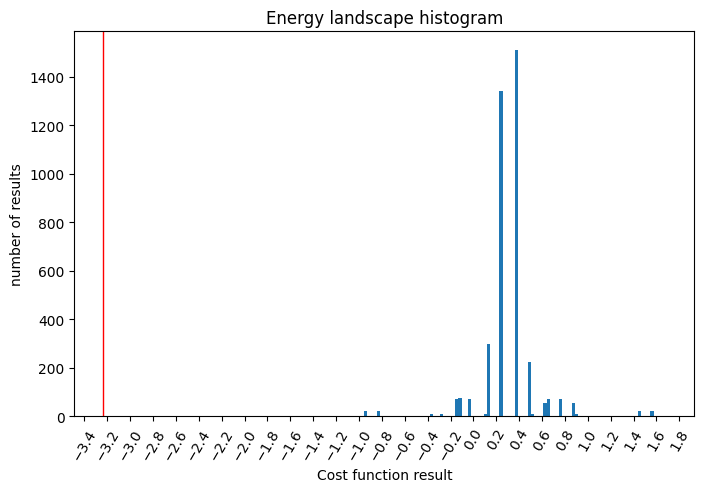

===Calculating Maxcut Landscapes===
attempting all MUB states over the operator SparsePauliOp(['IIZZ', 'IZIZ', 'IZZI', 'ZIZI', 'ZZII', 'IIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -2.5+0.j])
Energy Landscape:


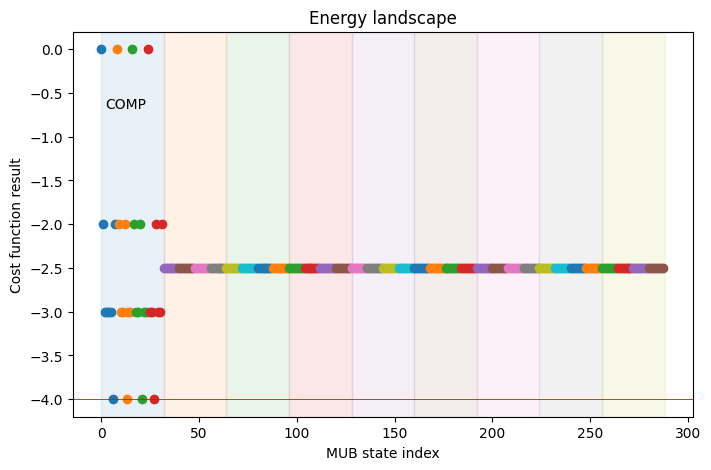

Energy Histogram:


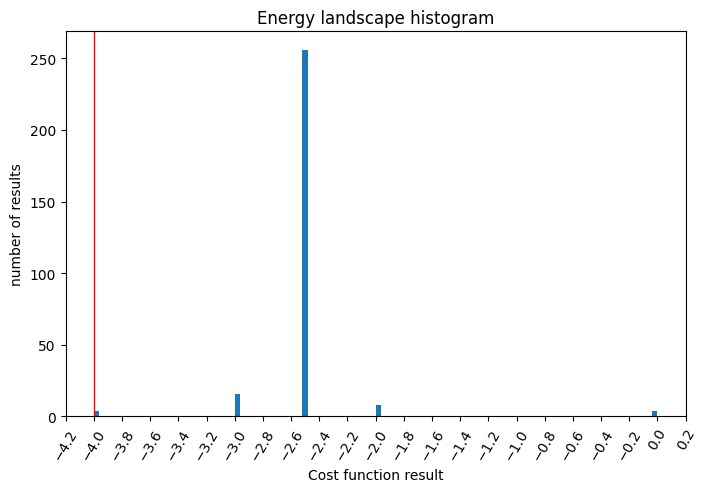

attempting all MUB states over the operator SparsePauliOp(['IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIZZI', 'IZIZI', 'IZZII', 'ZIZII', 'ZZIII', 'IIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j, -4.5+0.j])
Energy Landscape:


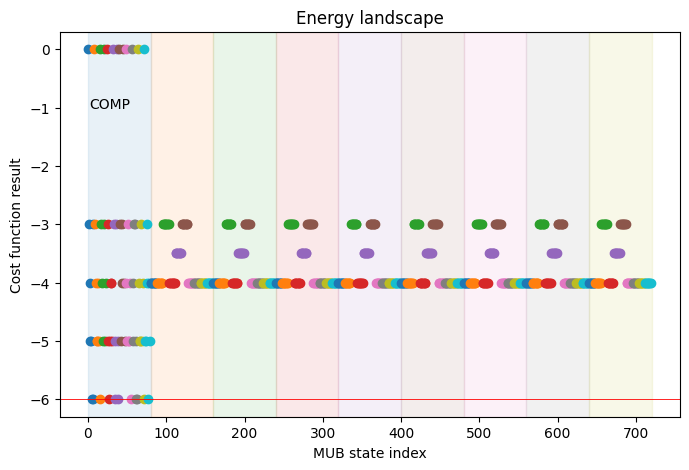

Energy Histogram:


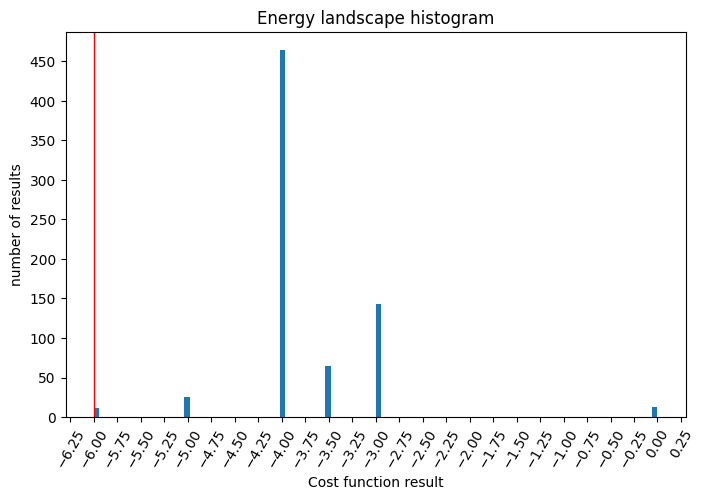

attempting all MUB states over the operator SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IIZIIZ', 'IZIIIZ', 'IIIZZI', 'IIZIZI', 'IZIIZI', 'IIZZII', 'IZIZII', 'ZIIZII', 'ZIZIII', 'ZZIIII', 'IIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j])
Energy Landscape:


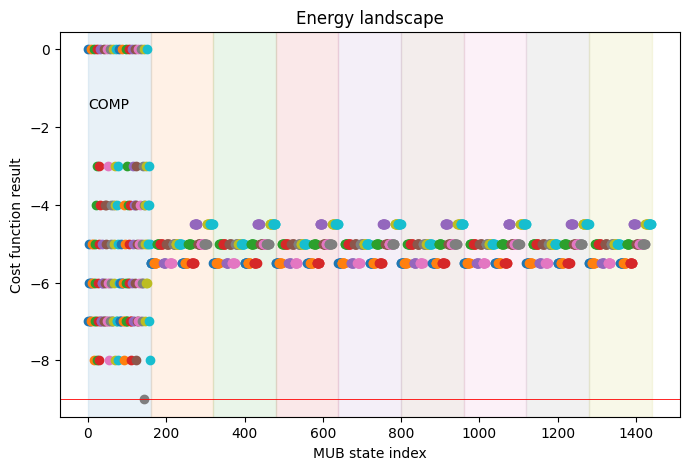

Energy Histogram:


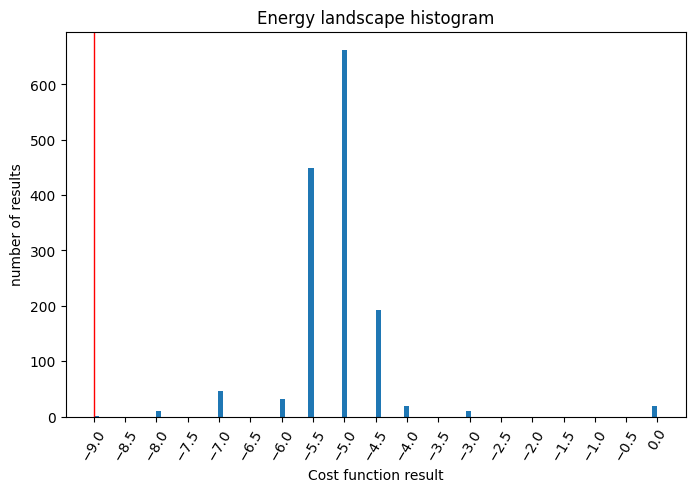

attempting all MUB states over the operator SparsePauliOp(['IIIIIZZ', 'IIZIIIZ', 'IZIIIIZ', 'ZIIIIIZ', 'IIZIIZI', 'IZIIIZI', 'IIIZZII', 'IIZIZII', 'IZIIZII', 'ZIIZIII', 'ZIZIIII', 'ZZIIIII', 'IIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j])
Energy Landscape:


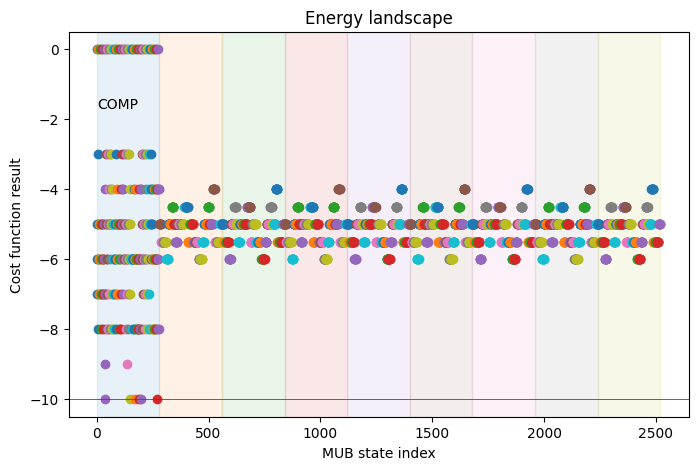

Energy Histogram:


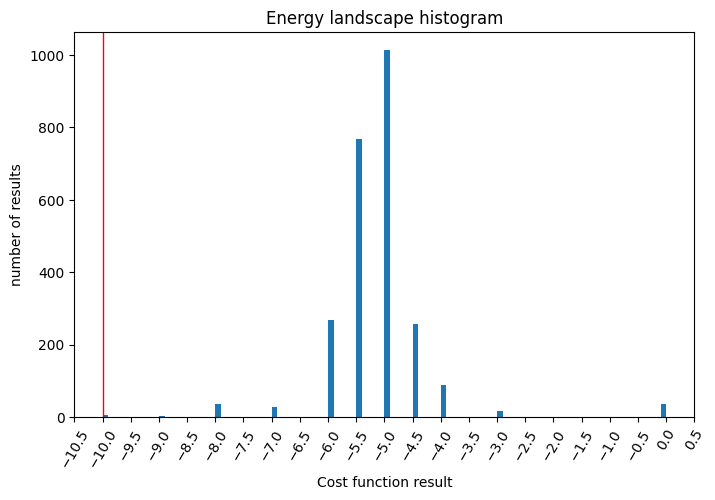

attempting all MUB states over the operator SparsePauliOp(['ZIIIIIIZ', 'IIIIZIZI', 'IZIIIIZI', 'IIZIIZII', 'ZIIIIZII', 'IIIZZIII', 'IIZIZIII', 'IZIIZIII', 'ZIIIZIII', 'IIZZIIII', 'ZIIZIIII', 'IZZIIIII', 'ZIZIIIII', 'ZZIIIIII', 'IIIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
 -7. +0.j])
Energy Landscape:


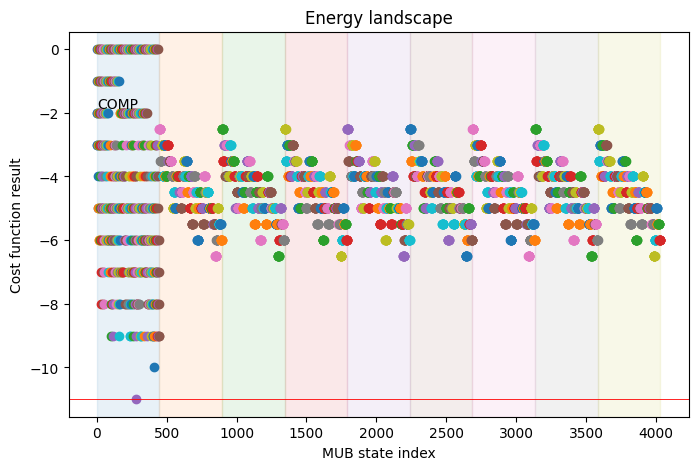

Energy Histogram:


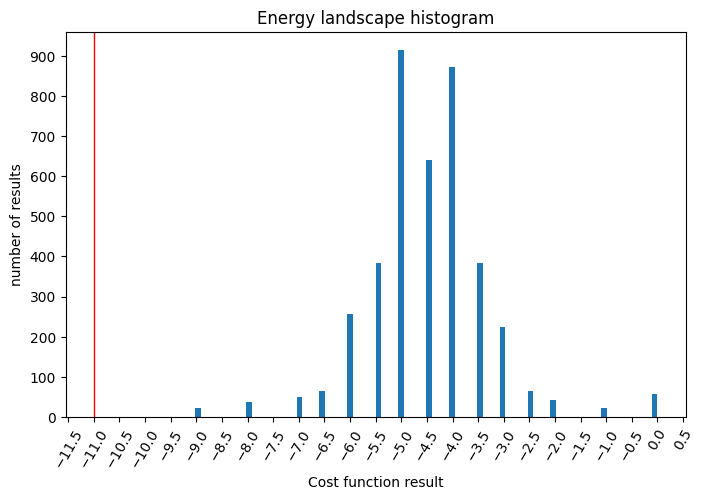

In [ ]:
print("===Calculating Molecular Landscapes===")
n_qubits = LiH_ham_1_5.num_qubits 
ansatz = get_twolocal(n_qubits, n_qubits)
LiH_landscape = run_and_record_landscape_shifted(LiH_ham_1_5, n_mub_qubits, ansatz)

print("===Calculating Transverse Landscapes===")
transverse_landscapes = []
for n_qubits, ham in zip(n_qubits_list, transverse_hams):
    ansatz = get_twolocal(n_qubits, n_qubits)
    transverse_landscapes.append(run_and_record_landscape_shifted(ham, n_mub_qubits, ansatz))

print("===Calculating Maxcut Landscapes===")
maxcut_landscapes = []
for n_qubits, ham in zip(n_qubits_list, maxcut_hams):
    ansatz = get_twolocal(n_qubits, n_qubits)
    maxcut_landscapes.append(run_and_record_landscape_shifted(ham, n_mub_qubits, ansatz))

### VQE Runs

In [ ]:
n_qubits = LiH_ham_1_5.num_qubits
ansatz = get_twolocal(n_qubits, n_qubits) 
molecular_vqe_res = run_and_record_vqe_shifted(LiH_landscape, ansatz, record_progress=False)

The operator SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 'IXII', 'XXII', 'YYII', 'ZZII', 'XZII', 'XIII', 'ZIII', 'IZIZ', 'IZZX', 'IZIX', 'IZXX', 'IZYY', 'ZXIZ', 'IXIZ', 'ZXZX', 'IXZX', 'ZXIX', 'IXIX', 'ZXXX', 'IXXX', 'ZXYY', 'IXYY', 'XXIZ', 'YYIZ', 'XXZX', 'YYZX', 'XXIX', 'YYIX', 'XXXX', 'YYXX', 'XXYY', 'YYYY', 'ZZIZ', 'ZZZX', 'ZZIX', 'ZZXX', 'ZZYY', 'XZIZ', 'XIIZ', 'XZZX', 'XIZX', 'XZIX', 'XIIX', 'XZXX', 'XIXX', 'XZYY', 'XIYY', 'ZIIZ', 'ZIZX', 'ZIIX', 'ZIXX', 'ZIYY', 'IZZZ', 'IZXZ', 'IZXI', 'ZXZZ', 'IXZZ', 'ZXXZ', 'IXXZ', 'ZXXI', 'IXXI', 'XXZZ', 'YYZZ', 'XXXZ', 'YYXZ', 'XXXI', 'YYXI', 'ZZZZ', 'ZZXZ', 'ZZXI', 'XZZZ', 'XIZZ', 'XZXZ', 'XIXZ', 'XZXI', 'XIXI', 'ZIZZ', 'ZIXZ', 'ZIXI', 'IZZI', 'ZXZI', 'IXZI', 'XXZI', 'YYZI', 'ZZZI', 'XZZI', 'XIZI', 'ZIZI'],
              coeffs=[-1.99754128e-01+0.j, -9.17966069e-02+0.j, -2.73410751e-03+0.j,
  2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,
 -2.11959340e-01+0.j, 

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Traceback (most recent call last):
  File "/Users/ittay/venvs/quantum/lib/python3.12/site-packages/scipy/optimize/_cobyla_py.py", line 281, in calcfc
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    f = sf.fun(x)
        ^^^^^^^^^
  File "/Users/ittay/venvs/quantum/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 278, in fun
    self._update_fun()
  File "/Users/ittay/venvs/quantum/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 262, in _update_fun
    self._update_fun_impl()
  File "/Users/ittay/venvs/quantum/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 163, in update_fun
    self.f = fun_wrapped(self.x)
             ^^^^^^^^^^^^^^^^^^^
  File "/Users/ittay/venvs/quantum/lib/python3.12/site-packages/scipy/optimize/_diff

: 

In [1]:


print("===Performing Transverse-Ising VQE===")
for n_qubits, landscape in zip(n_qubits_list, transverse_landscapes):
    ansatz = get_twolocal(n_qubits, n_qubits)   
    run_and_record_vqe_shifted(landscape, ansatz)


print("===Performing MAXCUT VQE===")
for n_qubits, landscape in zip(n_qubits_list, maxcut_landscapes):
    ansatz = get_twolocal(n_qubits, n_qubits)
    run_and_record_vqe_shifted(landscape, ansatz)

===Performing Transverse-Ising VQE===


NameError: name 'n_qubits_list' is not defined